<a href="https://colab.research.google.com/github/nagadilip10/-Mini-Project-.ipynb/blob/main/Mini_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My code

In [29]:
!pip install bing-image-downloader 

time: 2.77 s (started: 2021-05-24 06:33:07 +00:00)


In [30]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.74 s (started: 2021-05-24 06:33:09 +00:00)


In [31]:
!mkdir images
#Making a directory with name image 

mkdir: cannot create directory ‘images’: File exists
time: 130 ms (started: 2021-05-24 06:33:12 +00:00)


In [32]:
from bing_image_downloader import downloader 
downloader.download("dumbell", limit = 30 , output_dir='images ', adult_filter_off= False)



[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from https://i.ebayimg.com/00/s/MTAyNFg1NzY=/z/sK4AAOSwGjxcrFY7/$_86.JPG
[%] File Downloaded !

[%] Downloading Image #2 from https://www.physiocare.co.uk/wp-content/uploads/2015/10/Dumbells.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ebayimg.com/00/s/NTc2WDEwMjQ=/z/hq4AAOSwKiZa73Xu/$_86.JPG
[%] File Downloaded !

[%] Downloading Image #4 from http://www.exercise-equipment-review.com/images/dumbell.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/SMYb7f6zi8A/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://api.vgfit.com/media/blogFiles/dumbbell_crunch_workout.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://st.depositphotos.com/1825387/1821/i/950/depositphotos_18218217-stock-photo-dumbell.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://i.ytimg.com/vi/jv3dxTXrG-8/hqdefault.jpg
[%] File Dow

In [33]:
from bing_image_downloader import downloader
downloader.download("football", limit = 30 , output_dir='images ', adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.sickchirpse.com/wp-content/uploads/2014/06/mexico-fan.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://8by8mag.com/wp-content/uploads/2015/07/PSG.png
[%] File Downloaded !

[%] Downloading Image #3 from http://vsaauctions.com/ItemImages/000016/16969d_lg.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://wallpapershome.com/images/wallpapers/madden-nfl-15-720x1280-american-football-sports-game-nfl-ps4-xbox-3240.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://weneedfun.com/wp-content/uploads/2016/01/Magnolia-Flower-16.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://hative.com/wp-content/uploads/2014/11/football-nail-art-designs/2-cool-football-nail-art-designs.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://ideas.evite.com/media/Gift-Exchange-Heineken-beer-1200.jpg
[%] File Downloaded !

[%] Downloading Image #

In [34]:
# Preprocessing Data
#Step 1 - Resizing
#Step 2 - Flatting data

#importing libraries

import os 
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.io import imread 
from skimage.transform import resize  #to resize images 

target = []
images = []
flat_data = []

DATADIR = '/content/images '
CATEGORIES = ['dumbell','football']

for category in CATEGORIES:   #To iterate in categories
   class_num = CATEGORIES.index(category)  #Labelling categories for easy access
   path = os.path.join(DATADIR,category)   #creating a path to iterate via images
   for img in os.listdir(path):
     img_array = imread(os.path.join(path,img))  #reading images
     img_resized = resize(img_array,(150,150,3)) #resizing images
     flat_data.append(img_resized.flatten())     #flattening images
     images.append(img_resized)
     target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 23.4 s (started: 2021-05-24 06:33:59 +00:00)


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 9.64 ms (started: 2021-05-24 06:34:23 +00:00)


In [36]:
#Splitting Data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)



time: 18.2 ms (started: 2021-05-24 06:34:23 +00:00)


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C':[1,10,100,1000], 'kernel':['linear']},
              { 'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},

]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 59.9 s (started: 2021-05-24 06:34:23 +00:00)


In [38]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1])

time: 140 ms (started: 2021-05-24 06:35:23 +00:00)


In [39]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1])

time: 6.4 ms (started: 2021-05-24 06:35:23 +00:00)


In [40]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_pred,y_test)

#Accuracy 


1.0

time: 8.33 ms (started: 2021-05-24 06:35:23 +00:00)


In [41]:
confusion_matrix(y_pred,y_test)

array([[16,  0],
       [ 0,  9]])

time: 7.99 ms (started: 2021-05-24 06:35:23 +00:00)


In [42]:
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

time: 46.4 ms (started: 2021-05-24 06:35:23 +00:00)


In [43]:
model = pickle.load(open('img_model.p','rb'))

time: 20.8 ms (started: 2021-05-24 06:35:23 +00:00)


Enter your URLhttps://image.shutterstock.com/image-photo/dumble-body-builder-use-everyday-260nw-786306163.jpg
(280, 390, 3)
Predicted Output:dumbell


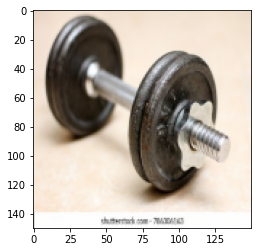

In [46]:
#Testing with an image
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output:{y_out}')